# Anime Webscraping and Database Creation

## Data Collection: Webscraping

In [57]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.preprocessing import LabelEncoder
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pyodbc
import re

print('The necessary libraries needed for the project are now loaded.')

The necessary libraries needed for the project are now loaded.


In [63]:
#location of chrome driver
driver_path = 'C:/Users/medma/Documents/Data Science/chromedriver_win32/chromedriver.exe'
#location of brave browser
brave_path = 'C:/Program Files (x86)/BraveSoftware/Brave-Browser/Application/brave.exe'

#give webdriver the brave browser location
option = webdriver.ChromeOptions()
option.binary_location = brave_path

#open a phantom version of the brave browser
browser = webdriver.Chrome(executable_path=driver_path, chrome_options=option)

#makes Selenium wait for 5 seconds before throwing an exception that it cannot find an element on the page loaded into the browser
wait = WebDriverWait(browser, 5)

print('Brave is built on open-source Chromium code, so a chromedriver can be used to open a phantom Brave browser.' '\n'
      'The paths for the driver and browser are stored, and a phantom Brave browser is now opened.' '\n'
      'The WebDriverWait method of Selenium, which will wait for 5 seconds before throwing an exception, is shortened and stored for later use.')

<ipython-input-63-dce5af64eeee>:11: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(executable_path=driver_path, chrome_options=option)


Brave is built on open-source Chromium code, so a chromedriver can be used to open a phantom Brave browser.
The paths for the driver and browser are stored, and a phantom Brave browser is now opened.
The WebDriverWait method of Selenium, which will wait for 5 seconds before throwing an exception, is shortened and stored for later use.


In [4]:
links = []
for page in range (0, 100, 50):
    browser.get('https://myanimelist.net/topanime.php?type=bypopularity&limit=' + str (page))
    #find all elements in page by "CSS Selector's element" and save them in variable "link"
    link = browser.find_elements(By.CSS_SELECTOR, 'div[class="detail"] h3 a')
    #for all elements in link append the href attribute and save them in links
    for item in link:
        links.append(item.get_attribute('href'))

print('Selenium is now scraping the url links of the top 100 popular anime, 50 animes at a time')

In [5]:
prankings = []
rankings = []
scores = []
titles = []
genres = []
episodes = []
studios = []
durations = []
ratings = []

for item_link in links:
    browser.get(item_link)
    #wait until the CSS selected element is visible and save the element in 'popularity'
    pranking = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'span[class="numbers popularity"]')))
    #wait until the CSS selected element is visible and save the element in 'ranking'
    ranking = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'span[class="numbers ranked"]')))
    #wait until the CSS selected element is visible and save the element in 'score'
    score = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div[class*="score-label"]')))
    #wait until the CSS selected element is visible and save the text in 'title'
    title = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div[class="h1-title"]')))
    #wait until the xpath selected text is visible and save the texts in 'genre'
    genre = wait.until(EC.visibility_of_element_located((By.XPATH, '//*[contains(text(), "Genres")]/parent::div')))
    #wait until the xpath selected text is visible and save the text in 'episode'
    episode = wait.until(EC.visibility_of_element_located((By.XPATH, '//*[contains(text(), "Episodes")]/parent::div')))
    #wait until the xpath selected text is visible and save the text in 'studio'
    studio = wait.until(EC.visibility_of_element_located((By.XPATH, '//*[contains(text(), "Studios")]/parent::div')))
    #wait until the xpath selected text is visible and save the text in 'duration'
    duration = wait.until(EC.visibility_of_element_located((By.XPATH, '//*[contains(text(), "Duration")]/parent::div')))
    #wait until the xpath selected text is visible and save the text in 'rating'
    rating = wait.until(EC.visibility_of_element_located((By.XPATH, '//*[contains(text(), "Rating")]/parent::div')))
    
    #for all elements in title, rating, and genre, save the texts in the lists titles, ratings, and genres
    prankings.append(pranking.text)
    rankings.append(ranking.text)
    scores.append(score.text)
    titles.append(title.text)
    genres.append(genre.text)
    episodes.append(episode.text)
    studios.append(studio.text)
    durations.append(duration.text)
    ratings.append(rating.text)


time.sleep(2)
browser.quit()

print('Selenium is now scraping all of the top 100 popular anime webpages for specified information one anime at a time.' '\n'
      'Once that process concludes, Selenium will make the phantom Brave browser wait 2 seconds and then close the browser.')

In [49]:
my_data = {'Popularity Rankings': prankings, 'Rankings': rankings, 'Scores': scores, 'Titles': titles, 'Genres': genres, 
           'Episodes': episodes, 'Studios': studios, 'Durations': durations, 'Ratings': ratings}
df = pd.DataFrame(data=my_data)

print('A dictionary is created that stores the lists for Popularity Rankings, Rankings, Scores, Titles, Genres, Episodes, Studios,' '\n'
      ' Durations, and Ratings. That dictionary is then stored into a dataframe.')

In [64]:
df.head()

,Popularity Rankings,Rankings,Scores,Titles,Genres,Episodes,Studios,Durations,Ratings
0,1,61,8.63,Death Note,"Mystery, Police, Psychological, Supernatural, ...",37,Madhouse,28,R-17+
1,2,103,8.51,Shingeki no Kyojin\nAttack on Titan,"Action, Military, Mystery, Super Power, Drama,...",25,"Production I.G, Wit Studio",28,R-17+
2,3,1,9.16,Fullmetal Alchemist: Brotherhood,"Action, Military, Adventure, Comedy, Drama, Ma...",64,Bones,28,R-17+
3,4,2783,7.21,Sword Art Online,"Action, Game, Adventure, Romance, Fantasy",25,A-1 Pictures,28,PG-13
4,5,93,8.53,One Punch Man,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",12,Madhouse,28,R-17+


## Data Cleaning

In [ ]:
#inspect the dataframe for unique values
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

In [51]:
#lambda x, regex, and loops for data cleaning 

#split away column names from column values in the first seven columns using lamba x: x.split
df['Popularity Rankings'] = df['Popularity Rankings'].apply(lambda x: x.split(' #')[1])
df['Rankings'] = df['Rankings'].apply(lambda x: x.split(' #')[1])
df['Genres'] = df['Genres'].apply(lambda x: x.split(': ')[1])
df['Episodes'] = df['Episodes'].apply(lambda x: x.split(': ')[1])
df['Studios'] = df['Studios'].apply(lambda x: x.split(': ')[1])

#standardize the Durations column to minutes using regular expressions
df['Durations'] = df['Durations'].replace(to_replace='^.*([0-9]{1}\s[a-z]{2}.\s[46]).*$', value='106', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([0-9]{1}\s[a-z]{2}.\s[10]).*$', value='130', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([0-9]{1}\s[a-z]{2}.\s[4]).*$', value='124', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([0-9]{1}\s[a-z]{2}.\s[13]).*$', value='133', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([0-9]{1}\s[a-z]{2}.\s[59]).*$', value='119', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([23]).*$', value='23', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([24]).*$', value='24', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([25]).*$', value='22', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([22]).*$', value='22', regex=True)
df['Durations'] = df['Durations'].replace(to_replace='^.*([28]).*$', value='28', regex=True)

#standardize the Ratings column and clean up remaining minor issues using a loop
for i in range(df.shape[0]):
    if df.iloc[i,5]=='Unknown':
        df.iloc[i,5]='984'
    if df.iloc[i,6] in ['Walt Disney Studios, GKIDS', 'Licensors: Walt Disney Studios']:
        df.iloc[i,6]='Studio Ghibli'
    if df.iloc[i,8]=='Rating: R - 17+ (violence & profanity)':
        df.iloc[i,8]='R-17+'
    if df.iloc[i,8]=='Rating: PG-13 - Teens 13 or older':
        df.iloc[i,8]='PG-13'
    if df.iloc[i,8]=='Rating: R+ - Mild Nudity':
        df.iloc[i,8]='R+'
    if df.iloc[i,8]=='Rating: PG - Children':
        df.iloc[i,8]='PG'
    if df.iloc[i,8]=='Rating: G - All Ages':
        df.iloc[i,8]='G'

#check the corrections
df.head(10)

print('There are a number of ways that the df dataframe can be cleaned. Three such ways include the use of lambda x, regex, and loops,' '\n'
      ' which have now all been used to clean parts of the df dataframe. The dataframe is now ready for data visualization.')

In [269]:
df.dtypes

print('Before visualizing the data, the data types for all the columns should be checked for incorrectness.')

Popularity Rankings    object
Rankings               object
Scores                 object
Titles                 object
Genres                 object
Episodes               object
Studios                object
Durations              object
Ratings                object
dtype: object

In [288]:
#convert the integer and float data into their corresponding data types
df['Popularity Rankings'] = df['Popularity Rankings'].astype(int)
df['Rankings'] = df['Rankings'].astype(int)
df['Scores'] = df['Scores'].astype(float)
df['Episodes'] = df['Episodes'].astype(int)
df['Durations'] = df['Durations'].astype(int)

#check the conversions
df.dtypes

print('Several data type corrections for columns are done and checked.')

Popularity Rankings      int32
Rankings                 int32
Scores                 float64
Titles                  object
Genres                  object
Episodes                 int32
Studios                 object
Durations                int32
Ratings                 object
dtype: object

## Data Visualization

### Genre Countplot

In [294]:
genre_join = ','.join(df['Genres'])
genre_join

print('All of the genres of all the animes are joined together in one huge series.')

'Mystery, Police, Psychological, Supernatural, Thriller, Shounen,Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen,Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen,Action, Game, Adventure, Romance, Fantasy,Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural,Action, Comedy, School, Shounen, Super Power,Action, Mystery, Horror, Psychological, Supernatural, Drama, Seinen,Action, Adventure, Comedy, Super Power, Martial Arts, Shounen,Romance, Supernatural, School, Drama,Action, Adventure, Fantasy, Shounen, Super Power,Sci-Fi, Psychological, Drama, Thriller,Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen,Game, Adventure, Comedy, Supernatural, Ecchi, Fantasy,Action, Comedy, Super Power, School, Shounen,Action, Demons, Historical, Shounen, Supernatural,Action, Adventure, Comedy, Super Power, Martial Arts, Shounen,Action, Military, Sci-Fi, Super Power, Drama, Mecha, School,Slice of Life, Comedy, Romance, School,Action, Comedy, Drama, School

In [293]:
genre_split = genre_join.split(',')
genre_split

print('The genre values are then split up by commas.')

['Mystery',
 ' Police',
 ' Psychological',
 ' Supernatural',
 ' Thriller',
 ' Shounen',
 'Action',
 ' Military',
 ' Mystery',
 ' Super Power',
 ' Drama',
 ' Fantasy',
 ' Shounen',
 'Action',
 ' Military',
 ' Adventure',
 ' Comedy',
 ' Drama',
 ' Magic',
 ' Fantasy',
 ' Shounen',
 'Action',
 ' Game',
 ' Adventure',
 ' Romance',
 ' Fantasy',
 'Action',
 ' Sci-Fi',
 ' Comedy',
 ' Parody',
 ' Super Power',
 ' Supernatural',
 'Action',
 ' Comedy',
 ' School',
 ' Shounen',
 ' Super Power',
 'Action',
 ' Mystery',
 ' Horror',
 ' Psychological',
 ' Supernatural',
 ' Drama',
 ' Seinen',
 'Action',
 ' Adventure',
 ' Comedy',
 ' Super Power',
 ' Martial Arts',
 ' Shounen',
 'Romance',
 ' Supernatural',
 ' School',
 ' Drama',
 'Action',
 ' Adventure',
 ' Fantasy',
 ' Shounen',
 ' Super Power',
 'Sci-Fi',
 ' Psychological',
 ' Drama',
 ' Thriller',
 'Action',
 ' Military',
 ' Mystery',
 ' Super Power',
 ' Drama',
 ' Fantasy',
 ' Shounen',
 'Game',
 ' Adventure',
 ' Comedy',
 ' Supernatural',
 ' Ecc

In [295]:
result = []
for x in genre_split:
    result.append(x.strip())
result

print('Consistent spacing is created through the stripping of leading and trailing whitespaces.')

['Mystery',
 'Police',
 'Psychological',
 'Supernatural',
 'Thriller',
 'Shounen',
 'Action',
 'Military',
 'Mystery',
 'Super Power',
 'Drama',
 'Fantasy',
 'Shounen',
 'Action',
 'Military',
 'Adventure',
 'Comedy',
 'Drama',
 'Magic',
 'Fantasy',
 'Shounen',
 'Action',
 'Game',
 'Adventure',
 'Romance',
 'Fantasy',
 'Action',
 'Sci-Fi',
 'Comedy',
 'Parody',
 'Super Power',
 'Supernatural',
 'Action',
 'Comedy',
 'School',
 'Shounen',
 'Super Power',
 'Action',
 'Mystery',
 'Horror',
 'Psychological',
 'Supernatural',
 'Drama',
 'Seinen',
 'Action',
 'Adventure',
 'Comedy',
 'Super Power',
 'Martial Arts',
 'Shounen',
 'Romance',
 'Supernatural',
 'School',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Shounen',
 'Super Power',
 'Sci-Fi',
 'Psychological',
 'Drama',
 'Thriller',
 'Action',
 'Military',
 'Mystery',
 'Super Power',
 'Drama',
 'Fantasy',
 'Shounen',
 'Game',
 'Adventure',
 'Comedy',
 'Supernatural',
 'Ecchi',
 'Fantasy',
 'Action',
 'Comedy',
 'Super Power',
 'Schoo

In [273]:
data = pd.Series(result)

print('The genres are saved in a new series.')

In [274]:
data

0            Mystery
1             Police
2      Psychological
3       Supernatural
4           Thriller
           ...      
513           Comedy
514       Historical
515           Demons
516     Supernatural
517          Shounen
Length: 518, dtype: object

In [275]:
# check available styles
print(plt.style.available)

# set the preferred style
style.use('ggplot')

print('The matplotlib library has many styles to choose from for visualization.' '\n' 
      ' Ggplot is a good choice, especially for those familiar with the software R')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:title={'center':'Most Popular Genre'}, xlabel='Genres', ylabel='Total Number of Times Genre is Present in Anime Data'>

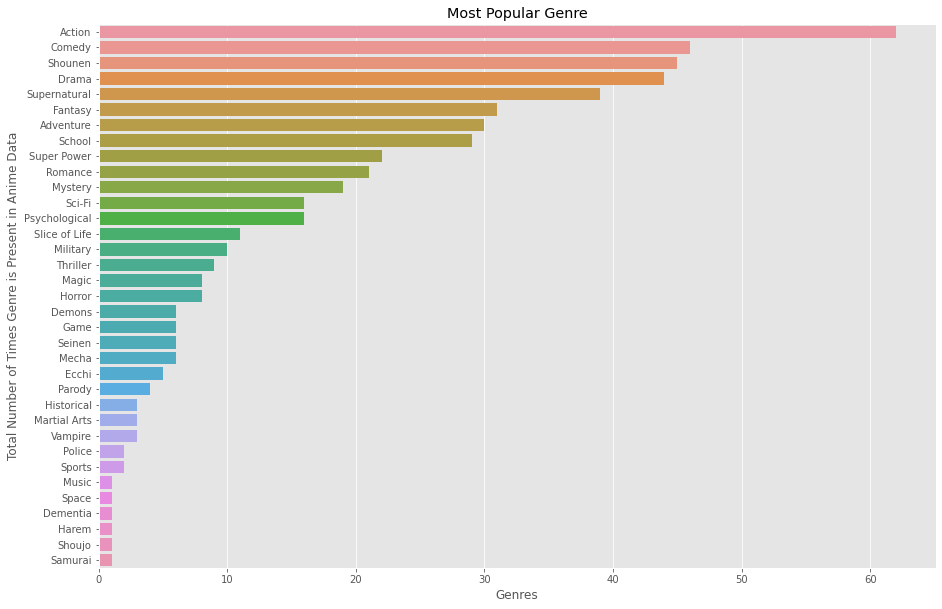

In [276]:
#get the value counts for each genre
mydata = []
for y in data.value_counts():
    mydata.append(y)
    
#get the labels for the value counts
labels = []
for z in data.value_counts().index.tolist():
    labels.append(z)
    
#create a dataframe for the counts and labels of the counts
newdf = pd.DataFrame(labels, mydata)

#create a plot
plt.figure(figsize=(15,10))
plt.title('Most Popular Genre')
plt.xlabel("Genres")
plt.ylabel("Total Number of Times Genre is Present in Anime Data")
sns.barplot(data=newdf, x=mydata, y=labels)

print('The value counts for each genre, along with their respective labels, are saved in a new dataframe.' '\n'
      ' A barplot is created to illustrate the most popular genres, with Action being the most popular genre.')

### Ratings Countplot

In [277]:
rating = pd.Series(df['Ratings'])
rating

print('Ratings values are ready to be visualized.')

0     R-17+
1     R-17+
2     R-17+
3     PG-13
4     R-17+
      ...  
95    PG-13
96    R-17+
97    PG-13
98        G
99    R-17+
Name: Ratings, Length: 100, dtype: object

<AxesSubplot:title={'center':'Most Popular Rating'}, xlabel='Ratings', ylabel='Total Number of Times Rating is Present in Anime Data'>

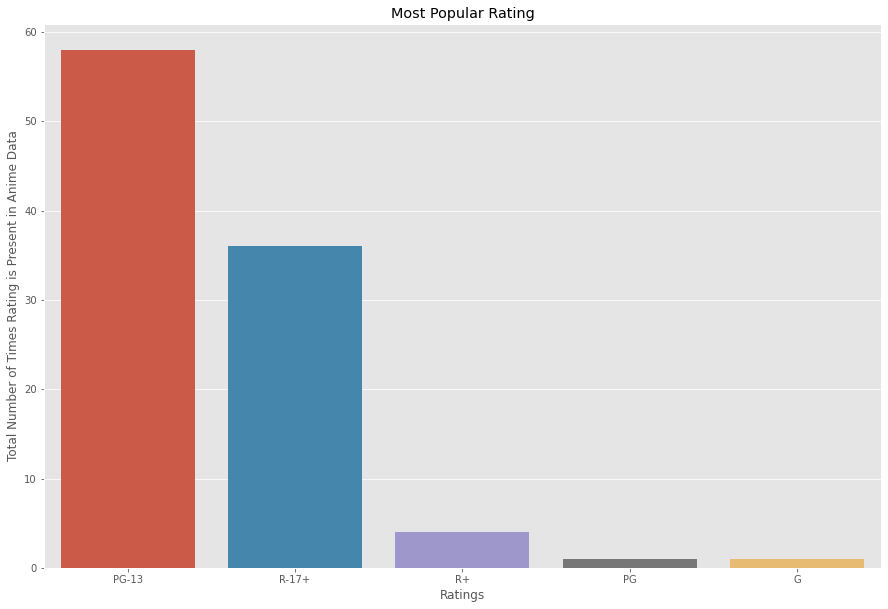

In [278]:
#get the value counts for each genre
ratings = []
for y in rating.value_counts():
    ratings.append(y)
    
#get the labels for the value counts
labels2 = []
for z in rating.value_counts().index.tolist():
    labels2.append(z)
    
#create a dataframe for the counts and labels of the counts
newdf2 = pd.DataFrame(labels2, ratings)

#create a plot
plt.figure(figsize=(15,10))
plt.title('Most Popular Rating')
plt.xlabel("Ratings")
plt.ylabel("Total Number of Times Rating is Present in Anime Data")
sns.barplot(data=newdf2, x=labels2, y=ratings)

print('The most popular rating by a decent margin is PG-13. This is unsurprising since most movie studios see PG-13 rated movies as the most profitable.')

## Database Creation

In [205]:
for driver in pyodbc.drivers():
    print(driver)
    
print('Loop through all pyodbc drivers to see which drivers are available for use.')

SQL Server
SQL Server Native Client 11.0
SQL Server Native Client RDA 11.0
PostgreSQL ANSI(x64)
PostgreSQL Unicode(x64)
Amazon Redshift (x64)
ODBC Driver 17 for SQL Server
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)


In [279]:
server = 'LAPTOP-51U9EL13\SQLEXPRESS' 
database = 'master' 

print('The server and database are now defined. A new database will be created, so the master database is used for now.')

In [280]:
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server}; \
    SERVER='+ server +'; \
    DATABASE='+ database +';\
    Trusted_Connection=yes;',
    autocommit=True
)

print('The connection string is defined to connect to Microsoft SSMS.')

In [249]:
cursor = conn.cursor()
cursor.execute("DROP DATABASE if exists MyAnimeList")
cursor.execute("CREATE DATABASE MyAnimeList")

print('A connection cursor is created to manipulate the master database. It is used to created a new database for myanimelist.')

In [250]:
cursor.execute("sp_databases")

for db in cursor:
    print(db)
    
print('All the databases in Microsoft SSMS are listed to check that the anime database has been created.')

('COVID19', 212992, None)
('master', 6592, None)
('model', 16384, None)
('msdb', 15872, None)
('MyAnimeList', 16384, None)
('SQL Tutorial', 16384, None)
('tempdb', 16384, None)


In [281]:
anime_database = "MyAnimeList"
conn_2 = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server}; \
    SERVER='+ server +'; \
    DATABASE='+ anime_database +';\
    Trusted_Connection=yes;',
    autocommit=True
)

cursor_2 = conn_2.cursor()

print('A connection string for the new database is created, along with a new cursor for manipulating that database.')

In [289]:
cursor_2.execute("DROP TABLE if exists top100popularanime")
cursor_2.execute('''CREATE TABLE top100popularanime
              ([Popularity Rankings] int,
               Rankings int,
               Scores float,
               Titles varchar(255), 
               Genres varchar(255), 
               Episodes varchar(255), 
               Studios varchar(255),
               Durations varchar(255), 
               Ratings varchar(255))

''')

conn_2.commit()

print('A table is created for insertion of the anime dataframe.')

In [290]:
array = pd.DataFrame.to_numpy(df)

print('An array of the values of the anime dataframe is created for insertion into the newly created anime table.')

In [291]:
#define the insert query
insert_query = '''INSERT INTO top100popularanime ([Popularity Rankings], Rankings, Scores, Titles, Genres, Episodes, Studios, Durations, Ratings) 
                  VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?);'''

#loop through each row in the dataframe
for row in array:
    #define the values to insert
    values = (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8])
    
    #insert the data into the database
    cursor_2.execute(insert_query, values)
    
#commit the inserts
conn_2.commit()

#grab all the rows in the myanimelist table
cursor_2.execute ('SELECT * FROM top100popularanime')

#loop through the results
for row in cursor_2:
    print(row)
    
print('Now the top100popularanime table has all of the values from the anime dataframe.')

(1, 61, 8.63, 'Death Note', 'Mystery, Police, Psychological, Supernatural, Thriller, Shounen', '37', 'Madhouse', '23', 'R-17+')
(2, 103, 8.51, 'Shingeki no Kyojin\nAttack on Titan', 'Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen', '25', 'Production I.G, Wit Studio', '24', 'R-17+')
(3, 1, 9.16, 'Fullmetal Alchemist: Brotherhood', 'Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen', '64', 'Bones', '24', 'R-17+')
(4, 2809, 7.21, 'Sword Art Online', 'Action, Game, Adventure, Romance, Fantasy', '25', 'A-1 Pictures', '23', 'PG-13')
(5, 93, 8.53, 'One Punch Man', 'Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural', '12', 'Madhouse', '24', 'R-17+')
(6, 528, 8.01, 'Boku no Hero Academia\nMy Hero Academia', 'Action, Comedy, School, Shounen, Super Power', '13', 'Bones', '24', 'PG-13')
(7, 845, 7.8, 'Tokyo Ghoul', 'Action, Mystery, Horror, Psychological, Supernatural, Drama, Seinen', '12', 'Studio Pierrot', '24', 'R-17+')
(8, 618, 7.94, 'Naruto', 'Action

In [313]:
topscores =  pd.DataFrame(cursor_2.execute("SELECT Scores \
                  FROM top100popularanime \
                  WHERE Scores >= 8 \
                  ORDER BY Scores DESC"))
topscoredtitles = pd.DataFrame(cursor_2.execute("SELECT Titles, Episodes, Studios \
                  FROM top100popularanime"))

top = pd.concat([topscores, topscoredtitles], axis=1)
top.head(20)

print('Here is apractice query on the top100popular anime table, followed by the creation of a dataframe for that query.')

,0,0
0,[9.16],"[Death Note, 37, Madhouse]"
1,[9.1],"[Shingeki no Kyojin\nAttack on Titan, 25, Prod..."
2,[9.1],"[Fullmetal Alchemist: Brotherhood, 64, Bones]"
3,[9.07],"[Sword Art Online, 25, A-1 Pictures]"
4,[8.97],"[One Punch Man, 12, Madhouse]"
5,[8.96],"[Boku no Hero Academia\nMy Hero Academia, 13, ..."
6,[8.95],"[Tokyo Ghoul, 12, Studio Pierrot]"
7,[8.91],"[Naruto, 220, Studio Pierrot]"
8,[8.91],"[Kimi no Na wa.\nYour Name., 1, CoMix Wave Films]"
9,[8.82],"[Hunter x Hunter (2011)\nHunter x Hunter, 148,..."
